  ## 1. Introduction

* 프로젝트

Python 기반으로 하여 Micro LED 데이터를 상세히 분석 할 수 있는 데이터 분석 소프트웨어 개발 목표
  

## 2. Project information
 
* 상세 내용<br>
 
 주요 목표는 PL 데이터에서 EL 데이터의 예상값을 도출하여 불량품을 확인하는 것이다.<br>
 
 주요 과제는 PL 세기 데이터에 대한 EL 데이터의 상관관계를 분석을 진행한다<br>
  
  주어진 전체 데이터를 크게 분류할 때<br>
  <br>
    - PL 세기 데이터<br>
    - EL 데이터<br>
  
  - 두가지이며, 먼저 분석에 용이하도록 데이터를 가공한다. 
  - 그 다음 Seaborn을 통해 상관관계를 분석하고 Pandas와 Matplotlib를 이용하여 표와 그래프를 각각 도출한다. 
  - 마지막으로 불량 데이터를 필터링 후 데이터 추출 및 근사하여 그래프로 표시한다.<br>
  
  이 프로그램을 통해<br>
   
    1. 데이터 간의 상관관계 분석
    2. 데이터 필터링
    3. 사용자가 원하는 그래프만 도출 가능

## 3. Install and run 

 * 시작할 때
    + 터미널로 들어가서, 하기의 문구를 입력한다.\
 ``pip install -r requirements.txt``


 * 실행 방법
   + 사용자가 분석하기 원하는 미가공 데이터 폴더를 지정한다.

## 4. Description of the module file feature


 ###  Graph fitting
 
   * 엑셀에서 미가공 PL과 EL 데이터를 추출하여 그래프로 나타낸다.   
   
       - 첫번째 그래프는 각각의 축에 따라 데이터 간의 상관관계를 나타내며 1과 -1에 가까울수록 데이터 간의 상관관계가 있음을 의미한다.
       - 두번째 그래프는 각각의 축에 따른 데이터 간의 산포도를 나타내며 이를 통해 군집 위치을 알 수 있다.
       - 데이터 값을 필터링 진행한 후 상위 두 그래프를 재도출한다.
       - PL 세기 데이터와 EL 전력 데이터 간의 상관관계를 도출하고 이를 바탕으로 근사식을 구할 수 있다.
       - 최종적으로 PL 데이터를 기반으로 하여 EL 데이터를 추출하여 불량률을 예측할 수 있다

## 5. Example of analysis result

In [1]:
#현재 디렉토리 확인
import os

os.chdir('../')
print(os.getcwd())

C:\Users\ASDL\Desktop\micro_led_analysis


  ❗caution❗

+ 만약 에러가 발생하게 되면 주피터 노트북 또는 커널을 재실행 해주세요.

In [2]:
# 필요한 라이브러리 호출
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [3]:
# 데이터 파일 읽기 및 데이터 전처리
file_name = 'Given_data'
df = pd.read_excel('./dat/%s.xlsx'%file_name)  # excel file 불러오기
df.drop(['No',' X Index',' Y Index',' X Size',' Y Size'],axis=1,inplace=True) #불필요한 column 지우기
df['PL JudgeType'].unique()  # PL JudgeType을 고유값으로 설정
for i in range(0,7590):
    if df.loc[i,'PL JudgeType'] == 'PL OK': # PL JudgeType를 1과 0으로 치환
        df.loc[i,'PL JudgeType'] = 1
    else:
        df.loc[i,'PL JudgeType'] = 0

for i in range(0,7590):                   # Itself Judge를 1과 0으로 치환
    if df.loc[i,'Itself Judge'] == 'EL OK':
        df.loc[i,'Itself Judge'] = 1
        df.loc[i,'Error flag'] = 'No error' # Ok일 경우 Error Flag column에 No error를 출력
    else:
        df.loc[i,'Error flag'] = df.loc[i,'Itself Judge'] # Error 발생 시 Effor flage에 Error 문구 출력
        df.loc[i,'Itself Judge'] = 0

df.to_excel('./dat/%s_modified.xlsx'%file_name) # 치환된 excel 파일 저장

In [4]:
# 전처리 된 파일 불러오기
df_1 = pd.read_excel('./dat/%s_modified.xlsx'%file_name) # 치환된 excel 파일 불러오기
df_1.drop(['Unnamed: 0',' PL_Min Value','Error flag'],axis=1,inplace=True) #불필요한 column 지우기
df_1['PL JudgeType'].unique()   # PL JudgeType을 고유값으로 설정

array([1, 0], dtype=int64)

In [5]:
# 전처리 이후 각 Column 별 상관관계 파악
df_1.corr() 

,PL JudgeType,PL_Sum,PL_Average,PL_Max Value,EL_PW,EL_PI,EL_DW,EL_II,EL_FWHM,EL_IR(A),EL_VR(V),EL_VF1(V),EL_VF2(V),EL_VF3(V),EL_PO-Top(W),Itself Judge
PL JudgeType,1.000000,0.221748,0.217961,0.316268,0.091623,0.086054,0.011777,0.071894,0.098022,0.428941,0.008965,-0.007796,-0.004805,-0.002067,0.125642,0.109088
PL_Sum,0.221748,1.000000,0.988944,0.872823,-0.076567,-0.061167,-0.038001,-0.017079,-0.013838,0.229400,-0.092440,0.178227,0.180804,0.161638,0.119837,-0.093483
PL_Average,0.217961,0.988944,1.000000,0.861703,-0.075193,-0.060099,-0.035753,-0.015862,-0.013066,0.228208,-0.088929,0.176178,0.179227,0.160318,0.116901,-0.093022
PL_Max Value,0.316268,0.872823,0.861703,1.000000,-0.033593,-0.004186,-0.025751,0.045088,0.049945,0.294392,-0.093397,0.133408,0.136986,0.119904,0.151975,-0.046161
EL_PW,0.091623,-0.076567,-0.075193,-0.033593,1.000000,0.287047,0.180358,0.238506,0.342468,0.145804,0.039377,-0.346514,-0.349235,-0.329754,0.317766,0.333204
EL_PI,0.086054,-0.061167,-0.060099,-0.004186,0.287047,1.000000,0.409502,0.957829,0.788333,0.098191,0.059557,-0.738194,-0.741803,-0.723021,0.707122,0.703333
EL_DW,0.011777,-0.038001,-0.035753,-0.025751,0.180358,0.409502,1.000000,0.346822,0.483469,0.058521,0.044171,-0.486118,-0.493530,-0.482793,0.452881,0.459372
EL_II,0.071894,-0.017079,-0.015862,0.045088,0.238506,0.957829,0.346822,1.000000,0.774099,0.080066,0.036717,-0.609508,-0.610494,-0.592949,0.574392,0.573297
EL_FWHM,0.098022,-0.013838,-0.013066,0.049945,0.342468,0.788333,0.483469,0.774099,1.000000,0.113489,0.041093,-0.826021,-0.825207,-0.809495,0.814380,0.769941
EL_IR(A),0.428941,0.229400,0.228208,0.294392,0.145804,0.098191,0.058521,0.080066,0.113489,1.000000,0.046047,0.086238,0.094179,0.097118,0.114730,0.112333


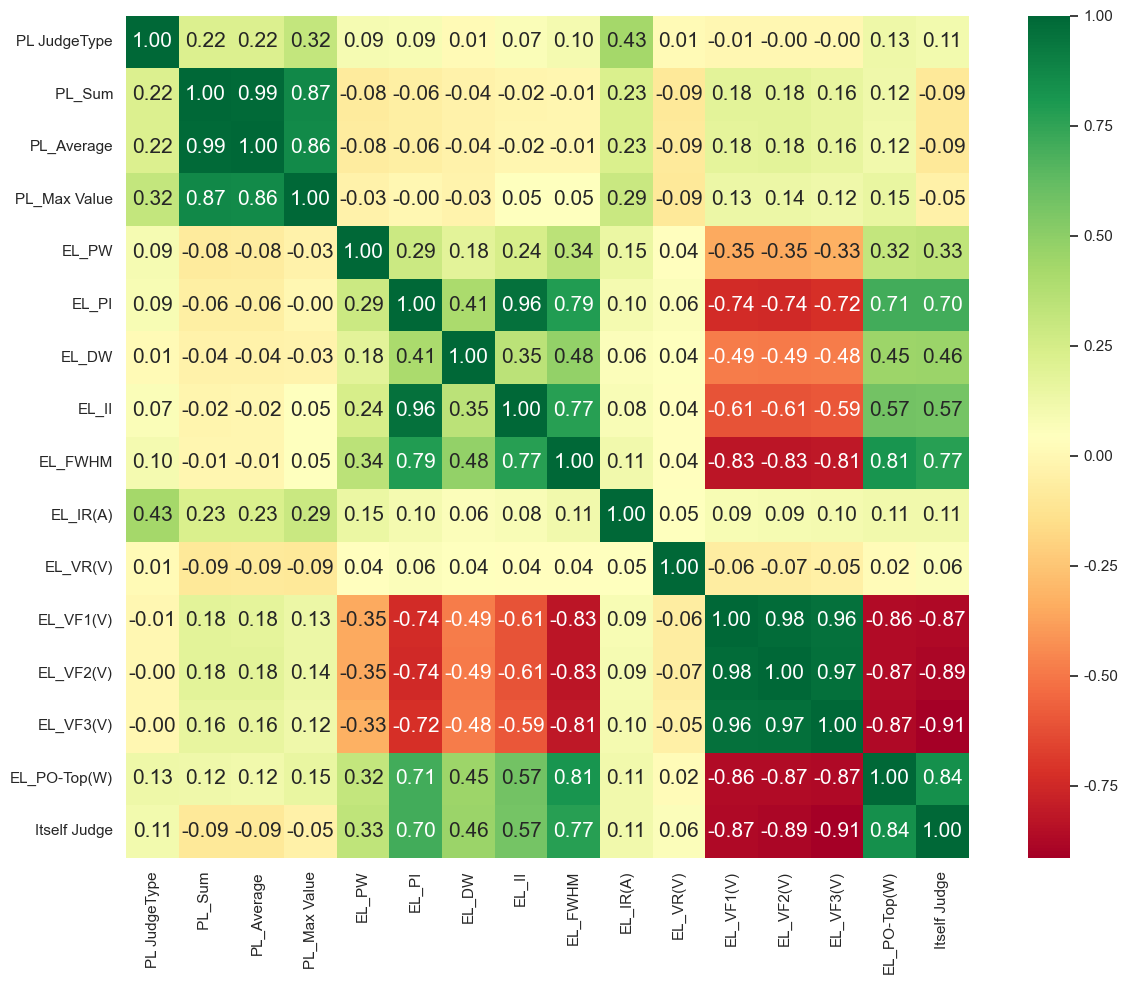

In [6]:
# 전처리 이후 각 Column별 상관관계 시각화
cols = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
corr = df_1[cols].corr(method = 'pearson') # 피어슨 상관계수 메소드를 사용하여 상관관계 설정

corr.values
column_names = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
sns.set(font_scale=1,rc={"axes.unicode_minus":False})
plt.figure(figsize = (13,10))
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names, #y축에 컬럼명 출력
            xticklabels=column_names, #x축에 컬럼명 출력
            cmap="RdYlGn") 
plt.tight_layout()
plt.show()

  ❗Important❗

+ 상관관계를 보았을 때, PL 측정 데이터와 EL 측정 데이터는 각 측정 방식에 따라서는 상관관계가 보임
+ PL 측정 데이터와 EL 측정 데이터와의 상관관계는 뚜렷한 관계가 보이지 않음
+ 데이터의 필터링 작업이 필요해보이는 것으로 판단

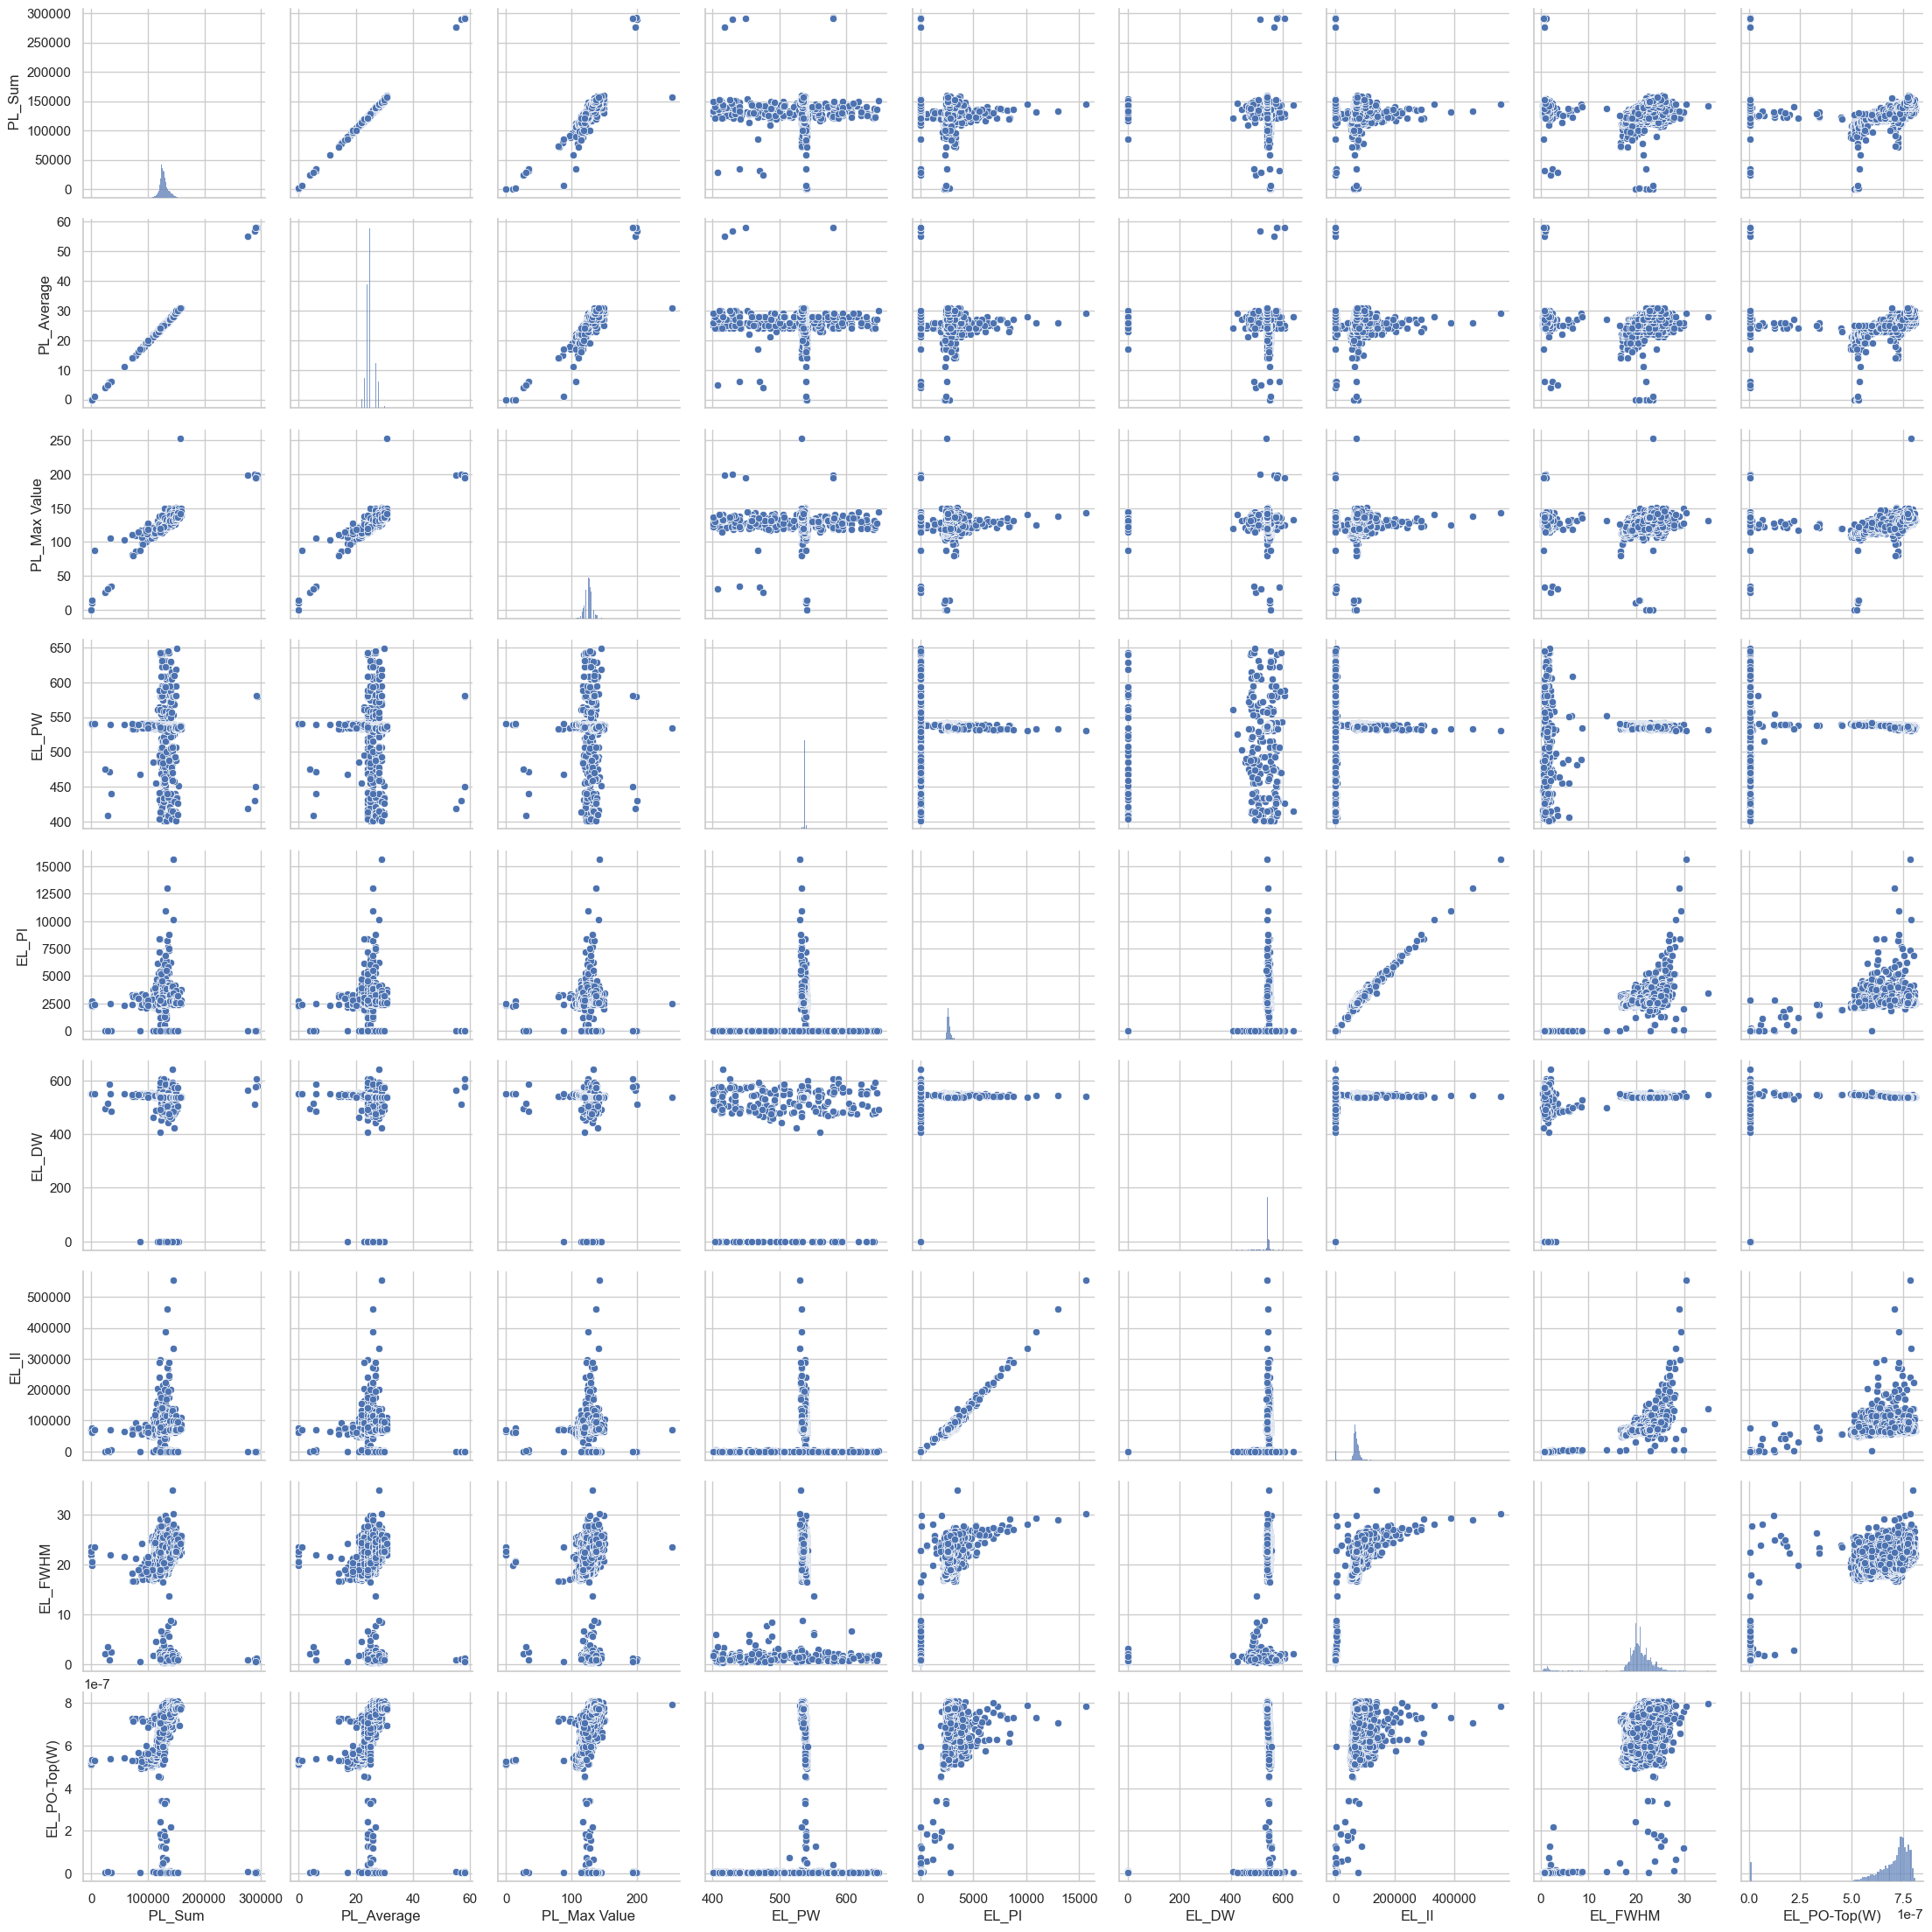

In [7]:
# 전처리 이후 각 Column 별 상관관계 그래프
sns.set(style='whitegrid') 
sns.pairplot(df_1[[' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_PO-Top(W)']]) # 'PL_Sum'과 'EL_P0-Top(W)' 사이의 상관관계 그래프로 나타내기
plt.show()

In [22]:
# 데이터 필터링 과정 진행
col = ['PL_JudgeType', 'PL_Sum', 'PL_Average', 'PL_Max Value', 'EL_PW', 'EL_PI', 'EL_DW', 'EL_II', 'EL_FWHM', 'EL_IR(A)', 'EL_VR(V)', 'EL_VF1(V)', 'EL_VF2(V)', 'EL_VF3(V)', 'EL_PO-Top(W)', 'Itself_Judge']
new_df = pd.DataFrame(columns=col) # 필터링 된 데이터를 넣어줄 새로운 데이터 프레임 생성
num = 0
for i in range(0,7590):
    if 105000 < df[' PL_Sum'][i] < 160000 and df['EL_PO-Top(W)'][i] > 4E-7: # 조건식에 맞는 데이터들 입력
        new_df_k.loc[i-num]=[df['PL JudgeType'][i], df[' PL_Sum'][i], df['PL_Average'][i], df['PL_Max Value'][i], df['EL_PW'][i], df['EL_PI'][i], df['EL_DW'][i], df['EL_II'][i], df['EL_FWHM'][i], df['EL_IR(A)'][i], df['EL_VR(V)'][i], df['EL_VF1(V)'][i], df['EL_VF2(V)'][i], df['EL_VF3(V)'][i], df['EL_PO-Top(W)'][i], df['Itself Judge'][i]]
    else :
        num = num + 1

In [24]:
# 필터링 작업 이후 각 Column 별 상관관계 파악
new_df.corr()

,PL_JudgeType,PL_Sum,PL_Average,PL_Max Value,EL_PW,EL_PI,EL_DW,EL_II,EL_FWHM,EL_IR(A),EL_VR(V),EL_VF1(V),EL_VF2(V),EL_VF3(V),EL_PO-Top(W),Itself_Judge
PL_JudgeType,1.000000,0.004503,0.007573,0.022706,-0.030552,0.004222,-0.037470,-0.001755,-0.007517,-0.000338,0.000100,0.004494,0.005568,0.003409,0.036095,-0.001545
PL_Sum,0.004503,1.000000,0.979046,0.837147,-0.599203,0.060858,-0.673703,0.104214,0.311663,0.024933,-0.115611,0.066807,0.086219,-0.018450,0.702251,0.020073
PL_Average,0.007573,0.979046,1.000000,0.818945,-0.581890,0.060859,-0.654849,0.104109,0.306458,0.023746,-0.110036,0.062654,0.082985,-0.018152,0.681667,0.017421
PL_Max Value,0.022706,0.837147,0.818945,1.000000,-0.451313,0.085738,-0.510690,0.144238,0.331995,0.026594,-0.122739,0.048600,0.070018,-0.033814,0.616237,0.010433
EL_PW,-0.030552,-0.599203,-0.581890,-0.451313,1.000000,-0.175165,0.779433,-0.114956,-0.090919,0.009723,0.102861,0.004242,-0.022210,0.114114,-0.742856,-0.060861
EL_PI,0.004222,0.060858,0.060859,0.085738,-0.175165,1.000000,0.060562,0.951786,0.360612,-0.026285,-0.003918,-0.010588,-0.007287,0.024169,-0.024890,0.009595
EL_DW,-0.037470,-0.673703,-0.654849,-0.510690,0.779433,0.060562,1.000000,0.196411,0.270622,0.007315,0.098781,-0.001592,-0.013911,0.135453,-0.839032,-0.083588
EL_II,-0.001755,0.104214,0.104109,0.144238,-0.114956,0.951786,0.196411,1.000000,0.606897,-0.019631,-0.019803,0.001079,0.018176,0.040370,-0.049884,-0.019235
EL_FWHM,-0.007517,0.311663,0.306458,0.331995,-0.090919,0.360612,0.270622,0.606897,1.000000,-0.003992,-0.076645,0.028371,0.076014,0.028578,0.094898,-0.064869
EL_IR(A),-0.000338,0.024933,0.023746,0.026594,0.009723,-0.026285,0.007315,-0.019631,-0.003992,1.000000,0.022083,0.079250,0.026048,0.004982,-0.007619,-0.001886


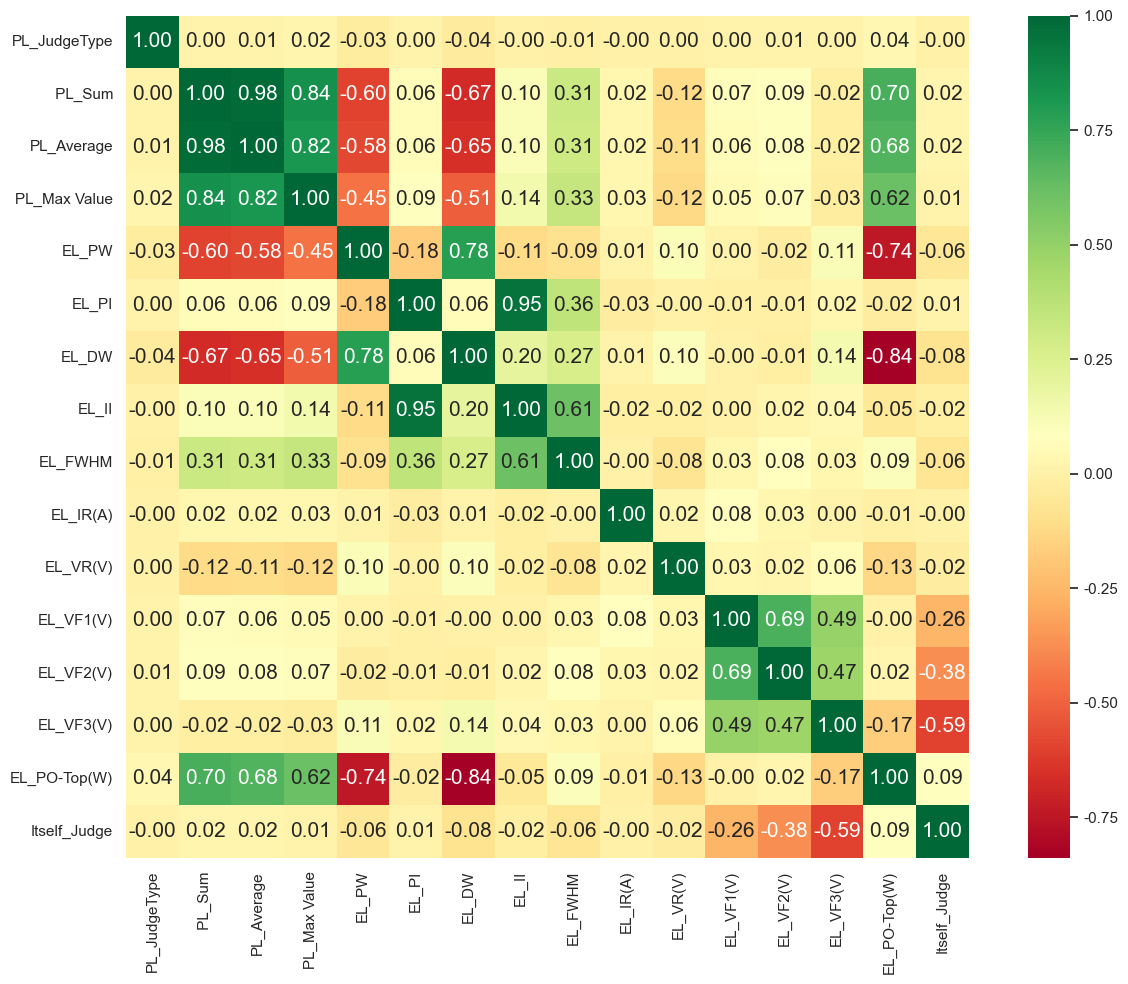

In [25]:
# 필터링 작업 이후 각 Column별 상관관계 시각화
cols = ['PL_JudgeType','PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself_Judge']
corr = new_df[cols].corr(method = 'pearson') # 피어슨 상관계수 메소드를 사용하여 상관관계 설정

corr.values
column_names = ['PL_JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself_Judge']
sns.set(font_scale=1,rc={"axes.unicode_minus":False})
plt.figure(figsize = (13,10))
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names, #y축에 컬럼명 출력
            xticklabels=column_names, #x축에 컬럼명 출력
            cmap="RdYlGn") 
plt.tight_layout()
plt.show()

  ❗Important❗

+ 필터링 이후 PL 측정 데이터와 EL 측정 데이터 상호간의 상관관계가 나타남
+ PL_Sum과 EL_P0-Top(W), EL_DW, EL_PW와의 상관관계는 높아지고 EL_FWHM, EL_VR(V)은 약간 높아진 것을 확인

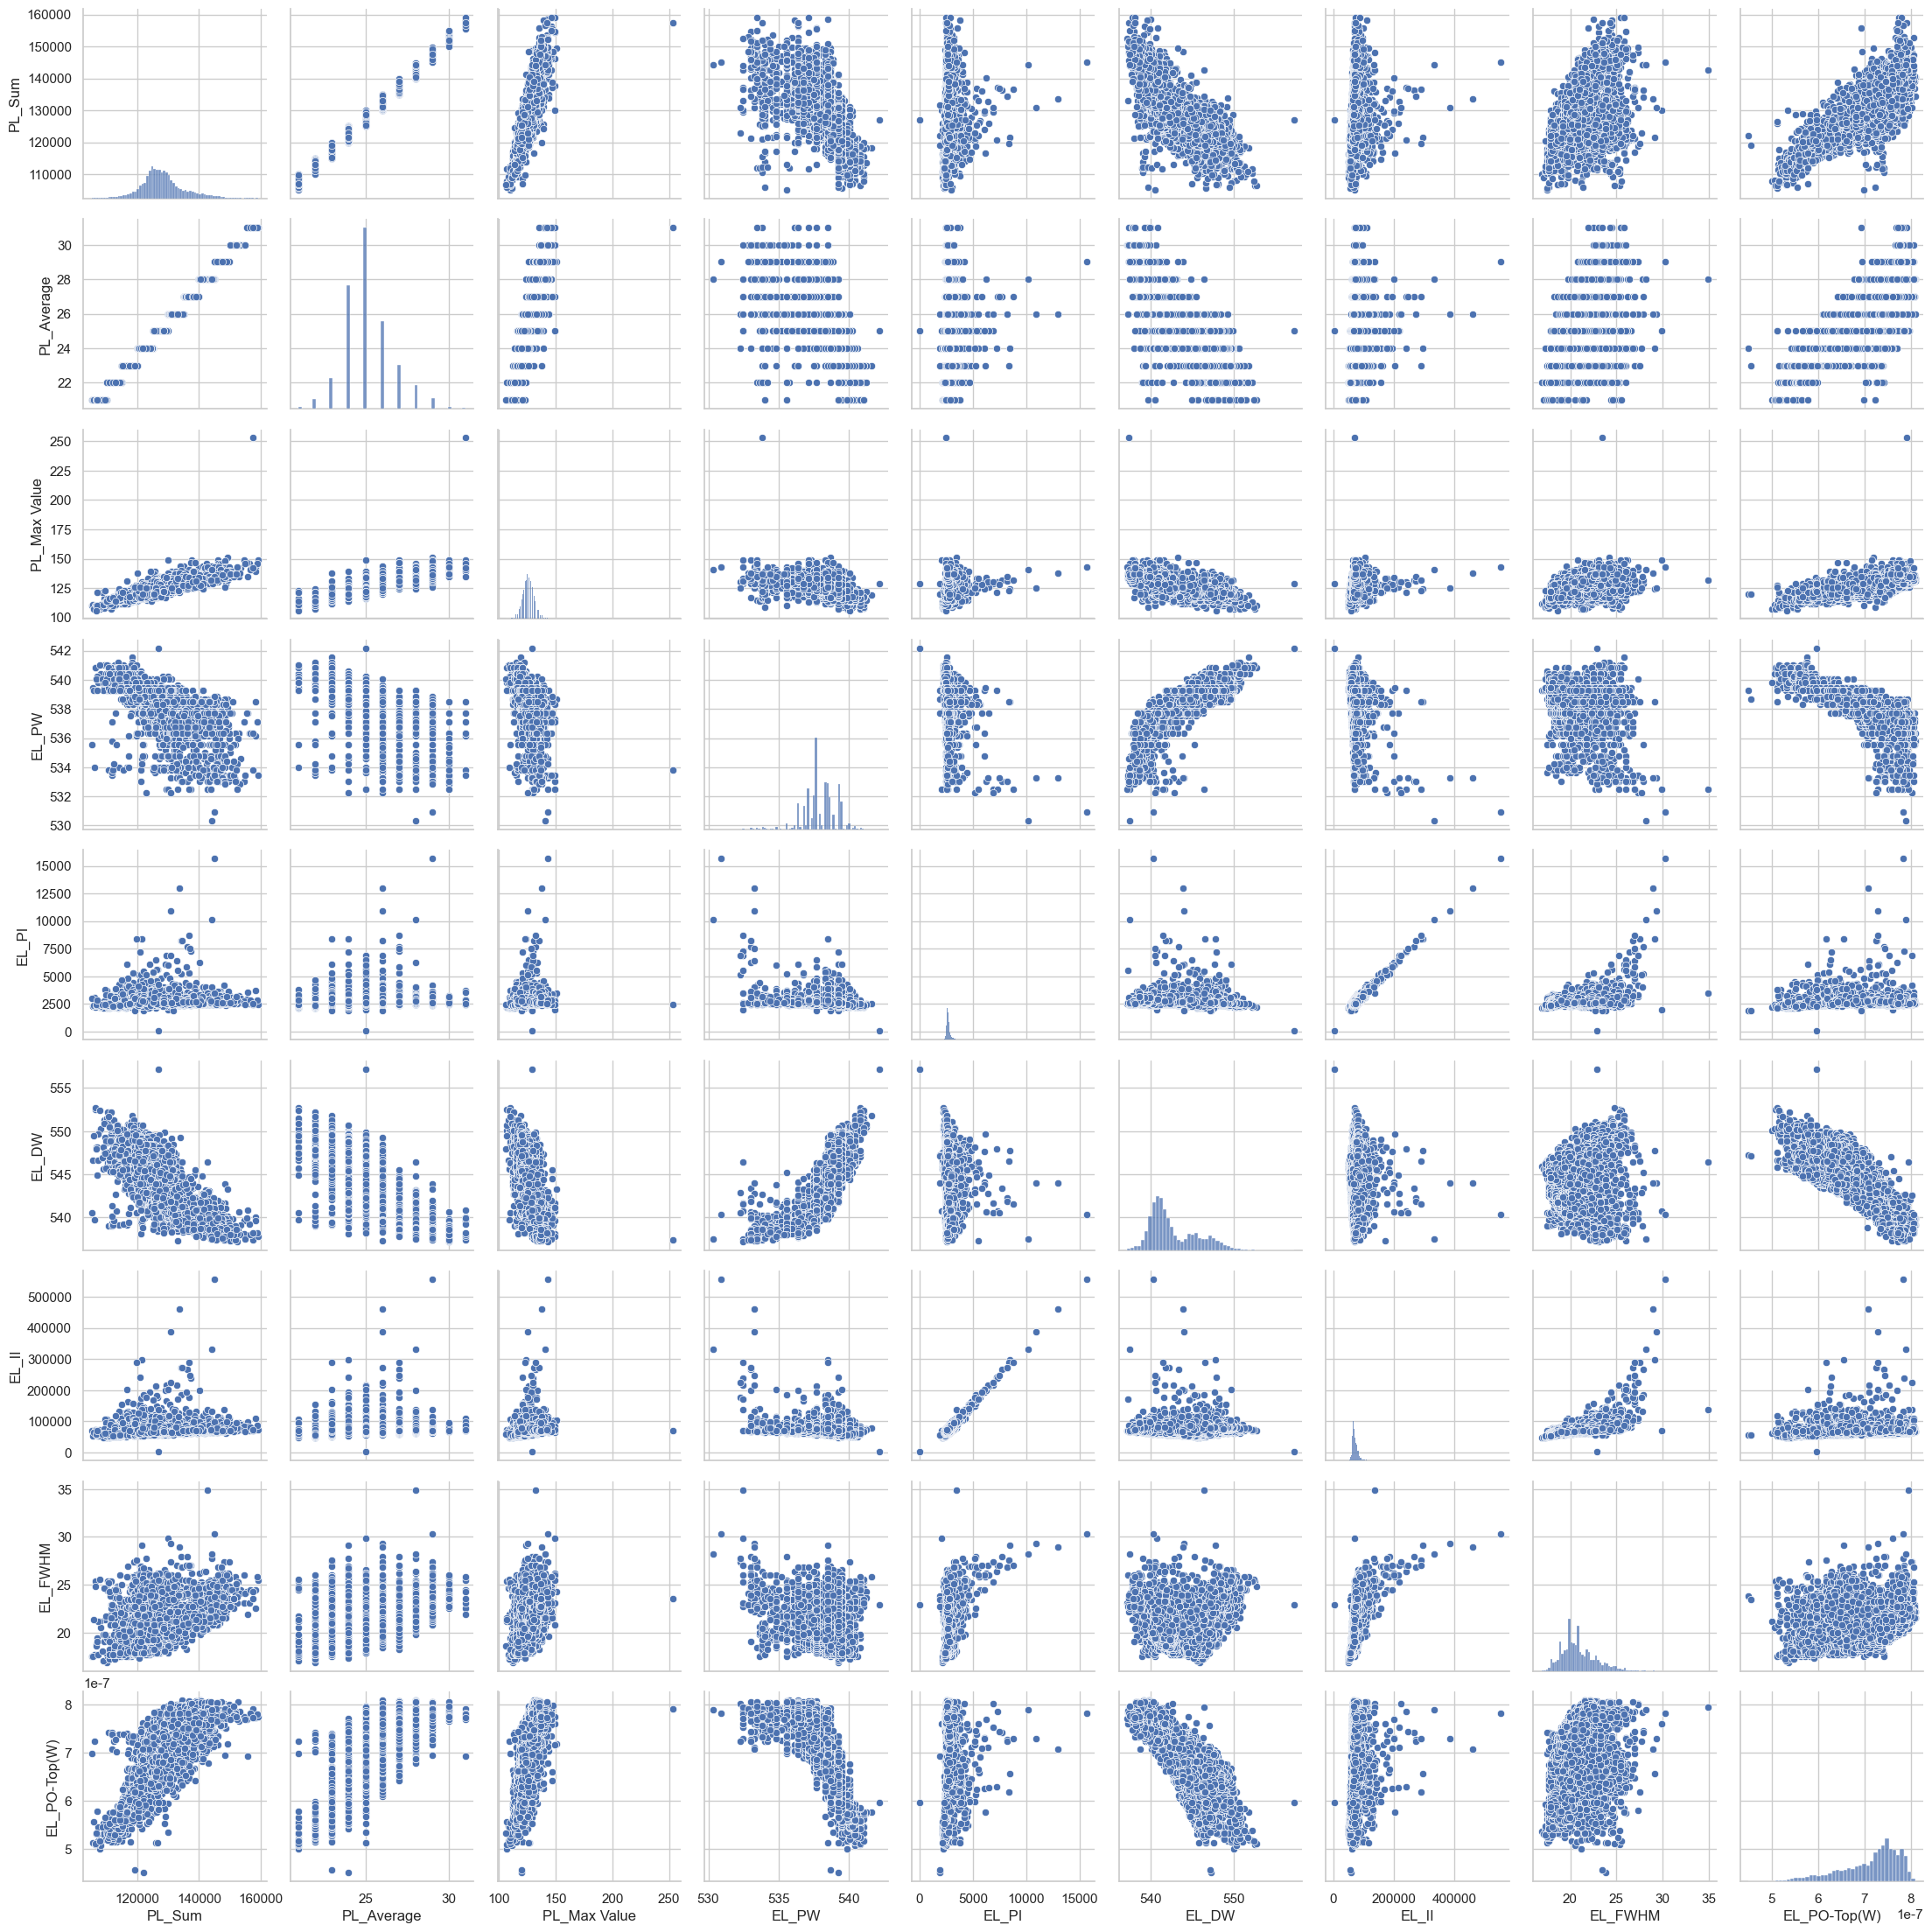

In [26]:
# 필터링 작업 이후 각 Column 별 상관관계 그래프
sns.set(style='whitegrid') 
sns.pairplot(new_df[['PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_PO-Top(W)']]) # 'PL_Sum'과 'EL_P0-Top(W)' 사이의 상관관계 그래프로 나타내기
plt.show()

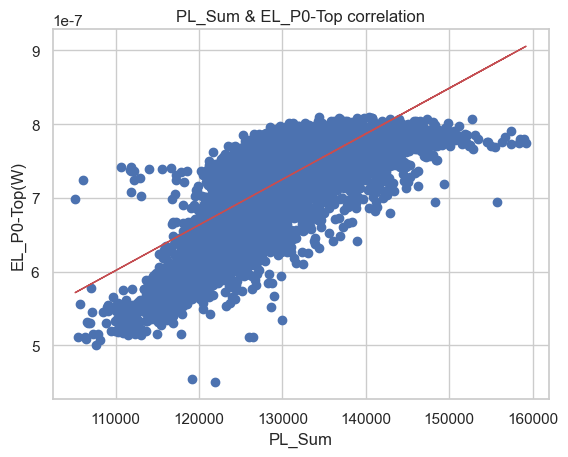

y = 6.183244341551196e-12 x -7.867114444990881e-08


In [28]:
#PL 데이터를 통한 EL 데이터 근사식 찾기
pf = np.polyfit(new_df['PL_Sum'],new_df['EL_PO-Top(W)'],1)
p1d = np.poly1d(pf)
plt.scatter(new_df['PL_Sum'],new_df['EL_PO-Top(W)'])
plt.xlabel('PL_Sum')
plt.ylabel('EL_P0-Top(W)')
plt.title('PL_Sum & EL_P0-Top correlation')
plt.plot(new_df['PL_Sum'],p1d(new_df['PL_Sum']),lw=1,color='r',label='polyfit')
plt.show()
print('y = %s x %s'%(p1d[1],p1d[0]))

  ❗Important❗

+ 우리가 최종적으로 원하는 것은 PL_Sum 값을 바탕으로 EL_P0-Top의 값이 얼마인지를 예측하는 것이다.
+ 그렇기에 필터링 된 데이터를 기반으로 근사식을 다음과 같이 찾을 수 있다.
+ 0.70의 상관관게를 갖는 위의 그래프를 바탕으로 우리는 PL 값으로 EL 값을 예측할 수 있다.